In [1]:
%load_ext autoreload

In [2]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../../python_tools')
import jupy_pandoc_utils as jpu
%autoreload 1
%aimport jupy_pandoc_utils

import matplotlib        as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['savefig.dpi']=150

# nbconvert latex test

**Lorem ipsum** dolor sit amet, consectetur adipiscing elit. Nunc luctus bibendum felis dictum sodales. Ut suscipit, orci ut interdum imperdiet, purus ligula mollis *justo*, non malesuada nisl augue eget lorem. Donec bibendum, erat sit amet porttitor aliquam, urna lorem ornare libero, in vehicula diam diam ut ante. Nam non urna rhoncus, accumsan elit sit amet, mollis tellus. Vestibulum nec tellus metus. Vestibulum tempor, ligula et vehicula rhoncus, sapien turpis faucibus lorem, id dapibus turpis mauris ac orci. Sed volutpat vestibulum venenatis.

This is a test list:

1. item 1
   - subitem 1
   - subitem 2
2. item 2
3. item 3

# Printing using python

In [3]:
next_paragraph = """
Aenean vitae diam consectetur, tempus arcu quis, ultricies urna. Vivamus venenatis sem 
quis orci condimentum, sed feugiat dui porta.
"""

def identity_dec(ob):
    return ob

@identity_dec
def nifty_print(text):
    """Used to test syntax highlighting"""
    
    print(text * 2)

nifty_print(next_paragraph)


Aenean vitae diam consectetur, tempus arcu quis, ultricies urna. Vivamus venenatis sem 
quis orci condimentum, sed feugiat dui porta.

Aenean vitae diam consectetur, tempus arcu quis, ultricies urna. Vivamus venenatis sem 
quis orci condimentum, sed feugiat dui porta.



# Pyout (and Text Wrapping)

In [4]:
Text = """
Aliquam blandit aliquet enim, eget scelerisque eros adipiscing quis. Nunc sed metus 
ut lorem condimentum condimentum nec id enim. Sed malesuada cursus hendrerit. Praesent 
et commodo justo. Interdum et malesuada fames ac ante ipsum primis in faucibus. 
Curabitur et magna ante. Proin luctus tellus sit amet egestas laoreet. Sed dapibus 
neque ac nulla mollis cursus. Fusce mollis egestas libero mattis facilisis.
"""
Text #Use print(Text) instead to get text wrapping in pdf

'\nAliquam blandit aliquet enim, eget scelerisque eros adipiscing quis. Nunc sed metus \nut lorem condimentum condimentum nec id enim. Sed malesuada cursus hendrerit. Praesent \net commodo justo. Interdum et malesuada fames ac ante ipsum primis in faucibus. \nCurabitur et magna ante. Proin luctus tellus sit amet egestas laoreet. Sed dapibus \nneque ac nulla mollis cursus. Fusce mollis egestas libero mattis facilisis.\n'

In [5]:
print(Text)


Aliquam blandit aliquet enim, eget scelerisque eros adipiscing quis. Nunc sed metus 
ut lorem condimentum condimentum nec id enim. Sed malesuada cursus hendrerit. Praesent 
et commodo justo. Interdum et malesuada fames ac ante ipsum primis in faucibus. 
Curabitur et magna ante. Proin luctus tellus sit amet egestas laoreet. Sed dapibus 
neque ac nulla mollis cursus. Fusce mollis egestas libero mattis facilisis.



In [6]:
import numpy as np

a = np.random.rand(10,10)
print(a)
a

[[0.33520813 0.83802892 0.30638378 0.38113603 0.98836274 0.3172446
  0.2891722  0.85556341 0.43507086 0.30012501]
 [0.72346239 0.80083619 0.13257636 0.87316642 0.92948006 0.74320405
  0.23481632 0.40668767 0.16712725 0.30750508]
 [0.81563861 0.92361483 0.89628877 0.36067035 0.23212018 0.14908733
  0.23711083 0.52257131 0.93443301 0.8026964 ]
 [0.41528194 0.4899801  0.0821376  0.63104194 0.58999718 0.81522154
  0.98169928 0.94962063 0.24518478 0.0083764 ]
 [0.06521277 0.62424143 0.91099566 0.12911407 0.60840975 0.75929495
  0.5812828  0.99665643 0.98838358 0.66526654]
 [0.49082496 0.84909792 0.4039483  0.0475618  0.66595686 0.08073393
  0.59890437 0.13690958 0.07661237 0.37912384]
 [0.57472945 0.62644709 0.23593095 0.62563431 0.63357978 0.66468539
  0.32824805 0.92691036 0.77163918 0.58447959]
 [0.82486247 0.17073715 0.08648208 0.42765726 0.82815182 0.91285879
  0.32822903 0.81787713 0.89914425 0.07885086]
 [0.81687734 0.08903654 0.41934369 0.84451728 0.09955357 0.87224393
  0.50029571 

array([[0.33520813, 0.83802892, 0.30638378, 0.38113603, 0.98836274,
        0.3172446 , 0.2891722 , 0.85556341, 0.43507086, 0.30012501],
       [0.72346239, 0.80083619, 0.13257636, 0.87316642, 0.92948006,
        0.74320405, 0.23481632, 0.40668767, 0.16712725, 0.30750508],
       [0.81563861, 0.92361483, 0.89628877, 0.36067035, 0.23212018,
        0.14908733, 0.23711083, 0.52257131, 0.93443301, 0.8026964 ],
       [0.41528194, 0.4899801 , 0.0821376 , 0.63104194, 0.58999718,
        0.81522154, 0.98169928, 0.94962063, 0.24518478, 0.0083764 ],
       [0.06521277, 0.62424143, 0.91099566, 0.12911407, 0.60840975,
        0.75929495, 0.5812828 , 0.99665643, 0.98838358, 0.66526654],
       [0.49082496, 0.84909792, 0.4039483 , 0.0475618 , 0.66595686,
        0.08073393, 0.59890437, 0.13690958, 0.07661237, 0.37912384],
       [0.57472945, 0.62644709, 0.23593095, 0.62563431, 0.63357978,
        0.66468539, 0.32824805, 0.92691036, 0.77163918, 0.58447959],
       [0.82486247, 0.17073715, 0.0864820

# Image and plots

## As plain text using markdown

Once exported as markdown and converted to latex/pdf with pandoc, the `{width=60%}` will fix the width of the picture and the `My legend` will appear as caption:

```markdown
![My legend](figures/magnetostatics_field.png){width=50% #figlabel}
```

gives the result showns in [this figure](#figlabel).


![My legend](figures/magnetostatics_field.png){width=50% #figlabel}

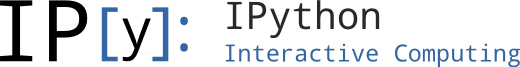

In [7]:
from IPython.core.display import Image
Image(data="http://ipython.org/_static/IPy_header.png")

## Plots produced by the code {.allowframebreaks}

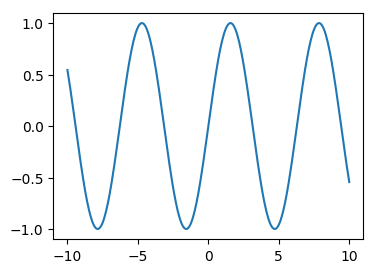

In [8]:
import numpy as np
x = np.linspace(-10,10,300)
y = np.sin(x)
plt.figure(figsize=(4,3),dpi=100)
p=plt.plot(x,y)

In [9]:
import os
os.getcwd() 

'/mnt/WorkRomain/pandoc-utils/examples/NotebookWithCode'

In [10]:
plt.figure(figsize=(8,3))
plt.plot(x,y)
plt.xlabel('$X_{e}$ [SI]')
plt.ylabel('$Y_{UPDATE12}$ [SI]')
plt.tight_layout()
jpu.plt2md('myplot','This is a test of how to get proper'+\
       'plot from Jupyter notebook in MD,'+\
       'to be processed using PANDOC','100%')

![This is a test of how to get properplot from Jupyter notebook in MD,to be processed using PANDOC](myplot.png){width=100% #myplot}

We can then refer to a given figure using cross-references [like this](#myplot), obtained with:
```markdown
[like this](#myplot)
```

In [11]:
plt.figure(figsize=(3,3))
plt.plot(np.sqrt(np.abs(x)),y**2)
plt.xlabel('$X_{e}$ [SI]')
plt.ylabel('$Y_{OTHER}$ [SI]')
plt.tight_layout()
jpu.plt2md('myplot2','This is another test of how to get proper'+\
       'plot from Jupyter notebook in MD,'+\
       'to be processed using PANDOC','50%')

![This is another test of how to get properplot from Jupyter notebook in MD,to be processed using PANDOC](myplot2.png){width=50% #myplot2}

In [12]:
plt.figure(figsize=(6,4))
plt.plot(x**3,y)
plt.plot(x**3,y+1)
plt.xlabel('test')
plt.ylabel('test2')
plt.tight_layout()
jpu.plt2md('myplot3','Adding more plot without re-creating a figure: curves cumulates','50%')

![Adding more plot without re-creating a figure: curves cumulates](myplot3.png){width=50% #myplot3}

In [13]:
plt.figure(figsize=(6,3))
plt.plot(x**2,y)
plt.xlabel('$X_{\omega} [Hz]$')
plt.ylabel('$Y_{\\varphi}$ [$\hbar$]')
plt.title('My beautiul plot')
plt.tight_layout()
jpu.plt2md('myplot4','More plot with re-creating a figure: only last curve','100%')

![More plot with re-creating a figure: only last curve](myplot4.png){width=100% #myplot4}

# Operator Highlighing Check

In [14]:
#This is a comment with an operation x @ y in it.
test = 5**9 + 2 - x @ y / (7 % 2) + True * 7
print(test)

a = set([1,2,3,4,5,6,7,8,9,0])
b = set([2,4,6,8,0])
a & b

1952904.9236703357


{0, 2, 4, 6, 8}

# Tables

## Markdown as plain text

First a *markdown* [table](#tbl:label1):

|Column 1 | Column 2|
---------|-----------|
| 1       | 3  |
|~~a~~    | b  |
|        4| &  |
Table: my caption {#tbl:label1}

## Pandas as default and Markdown {.allowframebreaks}

In [15]:
import pandas as pd
df=pd.DataFrame(np.random.randn(10,3))

Default printing is HTML, so it looks good  on the web but it is not well rendered in 
pdf via ipynb->MB->pdf (using nbconvert and pandoc). A special function `df2md(df)` is included in the `jupy_pandoc_utils` package to write out a markdown format. This allows to set caption and even to refer to the table in the main document [like this](#tbl:label2) (using vanilla pandoc) or cited like table [@Tbl:label2] (using pandoc-crossref filter, but hyperlink doesn't seem to work in HTML though)

In [16]:
# Good in HTML, but not pure markdown
# Impossible to put a caption
df.describe()

,0,1,2
count,10.000000,10.000000,10.000000
mean,0.217754,0.045411,-0.249525
std,0.793298,0.796672,0.611138
min,-1.614746,-1.356715,-1.066773
25%,-0.069524,-0.463006,-0.700146
50%,0.283010,0.082283,-0.181110
75%,0.831086,0.507939,0.240598
max,1.029950,1.491542,0.492206


In [35]:
# Good in pure MD and possible to put a caption and a label
jpu.df2md(df.describe(),'Caption table','#tbl:label2')

| **labels**   |          0 |          1 |         2 |
|:-------------|-----------:|-----------:|----------:|
| **count**    | 10         | 10         | 10        |
| **mean**     |  0.217754  |  0.0454111 | -0.249525 |
| **std**      |  0.793298  |  0.796672  |  0.611138 |
| **min**      | -1.61475   | -1.35671   | -1.06677  |
| **25%**      | -0.0695244 | -0.463006  | -0.700146 |
| **50%**      |  0.28301   |  0.0822832 | -0.18111  |
| **75%**      |  0.831086  |  0.507939  |  0.240598 |
| **max**      |  1.02995   |  1.49154   |  0.492206 |
Table: Caption table. {#tbl:label2}

One might want to display table without showing the code which leads to it, especially in a proper documentation. The following block will display the table in the final document but not the line
```python
jpu.df2md(df.describe(),'Caption table with hidden source code this time. {#tbl:label3}')
```
which produces it, as shown in [@Tbl:label3]

In [34]:
jpu.df2md(df.describe(),'Caption table with hidden source code this time', '#tbl:label3')

| **labels**   |          0 |          1 |         2 |
|:-------------|-----------:|-----------:|----------:|
| **count**    | 10         | 10         | 10        |
| **mean**     |  0.217754  |  0.0454111 | -0.249525 |
| **std**      |  0.793298  |  0.796672  |  0.611138 |
| **min**      | -1.61475   | -1.35671   | -1.06677  |
| **25%**      | -0.0695244 | -0.463006  | -0.700146 |
| **50%**      |  0.28301   |  0.0822832 | -0.18111  |
| **75%**      |  0.831086  |  0.507939  |  0.240598 |
| **max**      |  1.02995   |  1.49154   |  0.492206 |
Table: Caption table with hidden source code this time {#tbl:label3}

# Sympy output

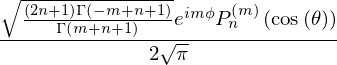

In [32]:
import sympy
from sympy.abc import x, n, m
sympy.init_printing()
theta = sympy.Symbol('theta')
phi = sympy.Symbol('phi')

sympy.simplify(sympy.Ynm(n,m,theta,phi).expand(func=True))

x + y as plain text.

$\frac{P_{n}^{\left(m\right)}\left(\cos{\left (\theta \right )}\right)}{2 \sqrt{\pi}} \sqrt{\frac{\left(- m + n\right)!}{\left(m + n\right)!} \left(2 n + 1\right)} e^{i m \phi}$

# Line Length

In [19]:
1 3 5 7 9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69 72 75 78 81 84 87 90 93 96 99 103

SyntaxError: invalid syntax (<ipython-input-19-d93d7d2148ce>, line 1)

In [33]:
# This to copy the current notebook
# and keep only the main produced plots
# and not all the copy made for quick refreshing of the page
jpu.clean_notebook('test.ipynb')

# This is to replace in the md output png file with pdf file
# when it exist (but need to be implemented!)
jpu.nb2md('test.ipynb')

test.md is created
